In [15]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [27]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../") if "../" not in sys.path else None # avoid adding multiple relave paths to sys.path

# custom packages
from ratsimulator import Agent, trajectory_generator
from ratsimulator.Environment import Rectangle, RectanglewObjects


In [28]:
a = RectanglewObjects()

Singular matrix
Singular matrix


# Initialise Environment

In [47]:
# Environment params
boxsize = (2.2, 2.2)
origo = (0,0)
soft_boundary = 0.2

# Init Environment
env = RectanglewObjects(boxsize=boxsize, soft_boundary=soft_boundary, no_objects = 5)
# 
# add extra walls
env.add_wall(name="free_wall1", bias=np.array([0.4,0.4]),slope=np.array([0.8,0.8]),t=[0,1])
env.add_wall(name="free_wall2", bias=np.array([0.4,1.5]),slope=np.array([0.8,0]),t=[0,1])

Singular matrix
Singular matrix
Singular matrix
Singular matrix


In [48]:
# create track
seq_len=2000
gen = trajectory_generator(env,seq_len=seq_len)
outputs = next(gen)
positions,agent = outputs[0], outputs[-1]

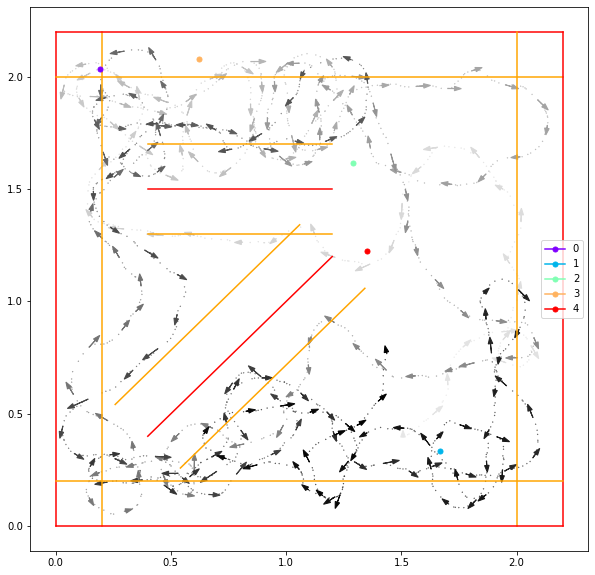

In [49]:
# plot track
fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
agent.plot_trajectory(axs,ds=8)
plt.legend()
#axs.scatter(*zip(*c))

In [38]:
pos_w_obj, obj_seen = agent.track_objects_seen()

In [42]:
pos_w_obj.shape

(190, 2)

In [41]:
print(agent.objects_observed.shape)
print(agent.positions.shape)
p_i = np.sum(agent.objects_observed, axis = 1)>0
print(p_i)
c = agent.positions[p_i]
d = agent.objects_observed[p_i]
print(c.shape)
print(d.shape)

(2001, 5)
(2001, 2)
[False False False ... False False False]
(190, 2)
(190, 5)


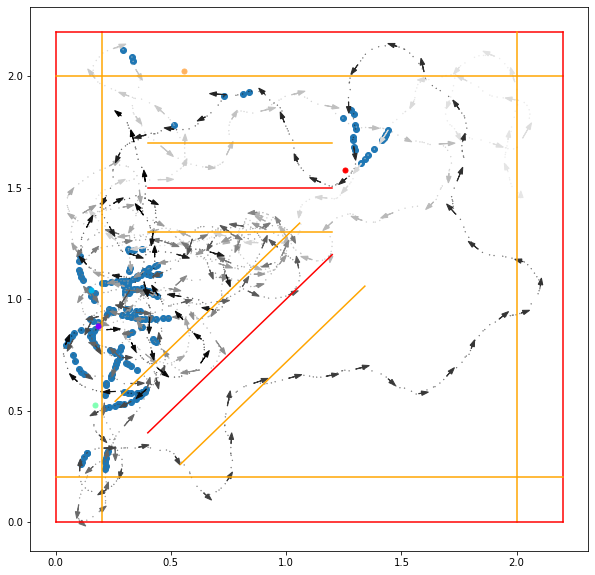

In [45]:

fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
axs.scatter(*zip(*pos_w_obj))
agent.plot_trajectory(axs,ds=8)

#axs.scatter(*zip(*c))

NameError: name 'po' is not defined

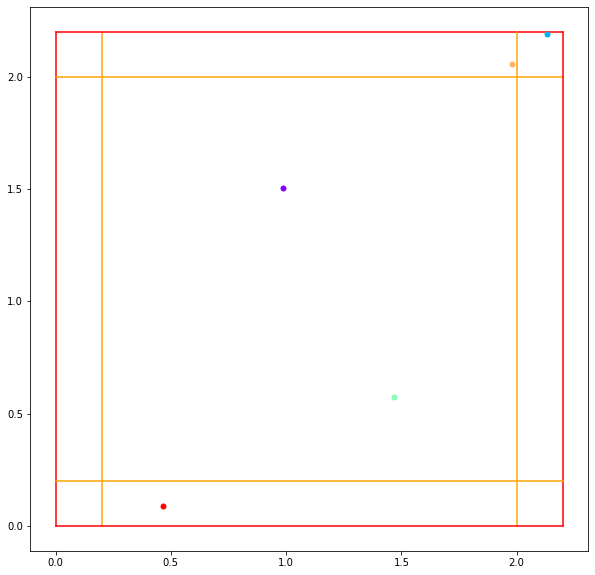

In [26]:
fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
axs.scatter(po)
agent.plot_trajectory(axs,ds=8)

#axs.scatter(*zip(*c))

In [121]:
print(c[0])
print(d[0])

[0.96448034 2.09819888]
[1. 0.]


In [146]:
#ax.scatter(*zip(*c))
env.plot_board(axs)
plt.show()

In [85]:
c.shape

(327, 2)

In [63]:
agent.positions[:3]

array([[2.1845626 , 1.87906482],
       [2.1922813 , 1.86908299],
       [2.19614065, 1.86255471]])

In [35]:
idx0 = agent.positions.shape[0]

delta_p = np.cumsum(agent.velocities[idx0:], axis=0) 
delta_p

array([], shape=(0, 2), dtype=float64)

In [5]:
import numpy as np
from scipy.spatial.distance import euclidean


def intersect(
    u1, v1, u2, v2, constraint1=[-np.inf, np.inf], constraint2=[-np.inf, np.inf]
):
    """
    Calculate intersection of two line segments defined as:
    l1 = {u1 + t1*v1 : u1,v1 in R^n, t1 in constraint1 subseq R},
    l2 = {u2 + t2*v2 : u2,v2 in R^n, t2 in constraint2 subseq R}

    Args:
        u1: bias of first line-segment
        v1: "slope" of first line-segment
        u2: bias of second line-segment
        v2: "slope" of first line-segment
        constraint1: 2d-array(like) of boundary points
                     for the "t-values" of the first line-segment
        constraint1: 2d-array(like) of boundary points
                     for the "t-values" of the second line-segment
    """
    matrix = np.array([v1, -v2]).T
    vector = u2 - u1
    try:
        solution = np.linalg.solve(matrix, vector)
    except np.linalg.LinAlgError as e:
        # Singular matrix (parallell line segments)
        print(e)
        return None, False

    # check if solution satisfies constraints
    if (constraint1[0] <= solution[0] <= constraint1[1]) and (
        constraint2[0] <= solution[1] <= constraint2[1]
    ):
        return u1 + solution[0] * v1, True
        # alternative calculation of the same intersection point
        # return u2 + solution[1]*v2, True

    return u1 + solution[0] * v1, False
    # return u2 + solution[1]*v2, False


In [13]:
u1 = np.array([0,0])
v1 = np.array([0,1])

u2 = np.array([0.5,0])
v2 = np.array([0,1])

a = intersect(u1, v1, u2, v2)[1]




Singular matrix


In [14]:
print(a)

False
